<a href="https://colab.research.google.com/github/mneskovic/SVM-Exploration/blob/master/SVMExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with SVM's


> Marko Neskovic

# SVM's in Colab with Random Gaussian Data

As an introduction to SVM's in Colab, I will be exploring SVM's by running experiments using two Gaussian distributions.

First, I'll do the standard imports:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

Next I'll make two Gaussian distributions (blobs) which are clearly separated.

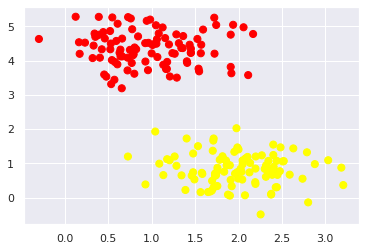

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=2,
                  random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Let's split our data into test and training data, fit a Support Vector Classifier to the training data, and see how well it performs.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's see the predictions for the training data, and the accuracy of our model.

In [ ]:
predictions = model.predict(X_test)
print(predictions)
percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

[1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0]
Accuracy = 100.0 %


With our data as separated as this, it is natural that an SVM would work very well, as it maximizes the margin between our clusters, and neither have outliers which fall on the wrong side.

Let's see what happens when we decrease the margin between the two clusters by increasing their standard deviations:


[0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1]
Accuracy = 73.33333333333333 %


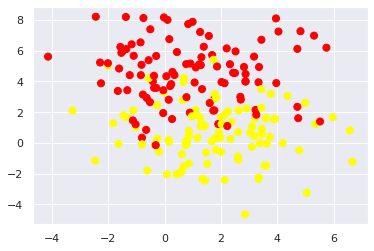

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2,
                  random_state=0, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)
percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

As the margin decreases and there is more overlap between the clusters, the SVM begins to incorrectly classify some points because they are on the wrong side of the hyperplane, which decreases our accuracy.

Now let's add an extra feature/dimension to our data:

[0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0]
Accuracy = 96.66666666666667 %


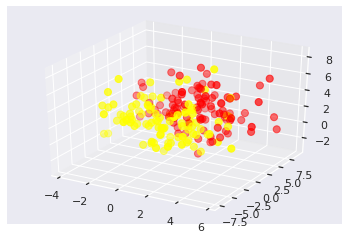

In [ ]:
X, y = make_blobs(n_samples=200, n_features=3, centers=2,
                  random_state=0, cluster_std=2)
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)
percentage = model.score(X_test, y_test)
print(f"Accuracy = {percentage*100} %")

As we can see, adding an extra feature to our data makes it more complex. It is evident, given the increased accuracy, that even with overlapping data our classifier worked better. This means that the extra feature held extra distinguishing power between the two distributions, which made it easier for our classifier to identify which class the data belongs to.